### Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [3]:
rent_houses_in_hyd = pd.read_csv('housing_rental_in_hyderbad.csv',index_col = False)

In [4]:
rent_houses_in_hyd.head(5)

,BHK,BHK_House_Type,Location,Price,Area_sqft,Furnishing_Status,Property_Seller,Amenities,Highlights
0,2.0,Flat,Gachibowli,"32,000",1200 sq.ft,Semi furnished,KGF Rentals,Lift • Parking • Power Backup • Water S...,NaN
1,3.0,Flat,Narsingi,"68,000",2335 sq.ft,Semi furnished,Datrika Srinivas,NaN,24x7 Security • ATM • Badminton Court • ...
2,3.0,Flat,Madhapur,"45,000",2500 sq.ft,Semi furnished,Mudavath Pushkar,NaN,Close to ATM • Close to Bus Stop • Close ...
3,2.0,Flat,Financial District,"65,000",1490 sq.ft,Fully furnished,MAHANYA PROPERTIES,NaN,24x7 Security • Children Play Area • Gymn...
4,3.0,Flat,Osman Nagar,"55,000",2584 sq.ft,Semi furnished,R Space Consultancy,NaN,24x7 Security • Badminton Court • Childre...


In [5]:
rent_houses_in_hyd.shape

(900, 9)

In [6]:
rent_houses_in_hyd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                887 non-null    float64
 1   BHK_House_Type     900 non-null    object 
 2   Location           900 non-null    object 
 3   Price              900 non-null    object 
 4   Area_sqft          900 non-null    object 
 5   Furnishing_Status  900 non-null    object 
 6   Property_Seller    900 non-null    object 
 7   Amenities          196 non-null    object 
 8   Highlights         704 non-null    object 
dtypes: float64(1), object(8)
memory usage: 63.4+ KB


In [7]:
rent_houses_in_hyd.duplicated().sum()

75

In [8]:
rent_houses_in_hyd[rent_houses_in_hyd.duplicated()]

,BHK,BHK_House_Type,Location,Price,Area_sqft,Furnishing_Status,Property_Seller,Amenities,Highlights
31,2.0,Flat,Nacharam,"24,015",1431 sq.ft,Semi furnished,Azuro.in,NaN,Gymnasium • Utility Shops • Swimming Pool...
33,2.0,Flat,Narsingi,"55,000",1370 sq.ft,Semi furnished,Mamta Shetty,Parking • Gas Pipeline,NaN
45,1.0,Flat,Kondapur,"14,500",758 sq.ft,Un-furnished,Shri Krishna Rentals,NaN,24x7 Security • Close to Bus Stop • Close...
46,3.0,Flat,Madhapur,"55,000",2000 sq.ft,Fully furnished,Srinunayak10,Lift • Parking • Power Backup • Water S...,NaN
54,5.0,Flat,Kondapur,"25,000",900 sq.ft,Semi furnished,Ravi Kumar,NaN,24x7 Security • ATM • Close to Bus Stop ...
...,...,...,...,...,...,...,...,...,...
769,1.0,Flat,Madhapur,"15,000",800 sq.ft,Un-furnished,Kalyan,Lift • Water Supply,NaN
772,2.0,Flat,Madhapur,"30,000",1200 sq.ft,Semi furnished,Kalyan,Lift • Parking • Water Supply,NaN
778,2.0,Flat,Madhapur,"30,000",1300 sq.ft,Semi furnished,Kalyan,Lift • Parking • Water Supply,NaN
779,1.0,Flat,Madhapur,"30,000",800 sq.ft,Fully furnished,Kalyan,Lift • Power Backup • Water Supply,NaN


In [9]:
704/900*100

78.22222222222223

In [10]:
rent_houses_in_hyd = rent_houses_in_hyd.drop('Amenities',axis = 1)

In [11]:
rent_houses_in_hyd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                887 non-null    float64
 1   BHK_House_Type     900 non-null    object 
 2   Location           900 non-null    object 
 3   Price              900 non-null    object 
 4   Area_sqft          900 non-null    object 
 5   Furnishing_Status  900 non-null    object 
 6   Property_Seller    900 non-null    object 
 7   Highlights         704 non-null    object 
dtypes: float64(1), object(7)
memory usage: 56.4+ KB


In [12]:
rent_houses_in_hyd.duplicated().sum()

79

In [13]:
rent_houses_in_hyd[rent_houses_in_hyd.duplicated()]

,BHK,BHK_House_Type,Location,Price,Area_sqft,Furnishing_Status,Property_Seller,Highlights
31,2.0,Flat,Nacharam,"24,015",1431 sq.ft,Semi furnished,Azuro.in,Gymnasium • Utility Shops • Swimming Pool...
33,2.0,Flat,Narsingi,"55,000",1370 sq.ft,Semi furnished,Mamta Shetty,NaN
34,2.0,Flat,Narsingi,"55,000",1370 sq.ft,Semi furnished,Mamta Shetty,NaN
45,1.0,Flat,Kondapur,"14,500",758 sq.ft,Un-furnished,Shri Krishna Rentals,24x7 Security • Close to Bus Stop • Close...
46,3.0,Flat,Madhapur,"55,000",2000 sq.ft,Fully furnished,Srinunayak10,NaN
...,...,...,...,...,...,...,...,...
777,2.0,Flat,Madhapur,"30,000",1200 sq.ft,Semi furnished,Kalyan,NaN
778,2.0,Flat,Madhapur,"30,000",1300 sq.ft,Semi furnished,Kalyan,NaN
779,1.0,Flat,Madhapur,"30,000",800 sq.ft,Fully furnished,Kalyan,NaN
780,1.0,Flat,Madhapur,"26,000",800 sq.ft,Fully furnished,Kalyan,NaN


In [14]:
rent_houses_in_hyd = rent_houses_in_hyd.drop_duplicates()

In [15]:
rent_houses_in_hyd.duplicated().sum()

0

In [16]:
rent_houses_in_hyd.shape

(821, 8)

In [17]:
rent_houses_in_hyd.isna().sum()

BHK                   13
BHK_House_Type         0
Location               0
Price                  0
Area_sqft              0
Furnishing_Status      0
Property_Seller        0
Highlights           178
dtype: int64

In [18]:
rent_houses_in_hyd['BHK'].isna().sum()

13

In [19]:
def infer_bhk(area_str):
    area = int(area_str.split()[0])  # e.g., "512 sq.ft" → 512
    if area <= 600:
        return 1
    elif area <= 1200:
        return 2
    elif area <= 2500:
        return 3
    else:
        return 4
rent_houses_in_hyd['BHK'] = rent_houses_in_hyd['Area_sqft'].apply(infer_bhk)

In [20]:
rent_houses_in_hyd['BHK'].isna().sum()

0

In [21]:
rent_houses_in_hyd['BHK'] = rent_houses_in_hyd['BHK'].astype(int)

In [22]:
rent_houses_in_hyd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 0 to 899
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                821 non-null    int32 
 1   BHK_House_Type     821 non-null    object
 2   Location           821 non-null    object
 3   Price              821 non-null    object
 4   Area_sqft          821 non-null    object
 5   Furnishing_Status  821 non-null    object
 6   Property_Seller    821 non-null    object
 7   Highlights         643 non-null    object
dtypes: int32(1), object(7)
memory usage: 54.5+ KB


In [23]:
rent_houses_in_hyd['Price']

0      32,000
1      68,000
2      45,000
3      65,000
4      55,000
        ...  
894    18,000
895    32,000
897    45,000
898    60,000
899    22,011
Name: Price, Length: 821, dtype: object

In [24]:
rent_houses_in_hyd['Price'] = rent_houses_in_hyd['Price'].str.replace(',','')

In [25]:
rent_houses_in_hyd['Price'].head(5)

0    32000
1    68000
2    45000
3    65000
4    55000
Name: Price, dtype: object

In [26]:
rent_houses_in_hyd['Price'] = rent_houses_in_hyd['Price'].astype(float)

In [27]:
rent_houses_in_hyd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 0 to 899
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                821 non-null    int32  
 1   BHK_House_Type     821 non-null    object 
 2   Location           821 non-null    object 
 3   Price              821 non-null    float64
 4   Area_sqft          821 non-null    object 
 5   Furnishing_Status  821 non-null    object 
 6   Property_Seller    821 non-null    object 
 7   Highlights         643 non-null    object 
dtypes: float64(1), int32(1), object(6)
memory usage: 54.5+ KB


In [28]:
rent_houses_in_hyd['Area_sqft'] = rent_houses_in_hyd['Area_sqft'].str.replace(' sq.ft','')

In [29]:
rent_houses_in_hyd['Area_sqft'] = rent_houses_in_hyd['Area_sqft'].astype(float)

In [30]:
rent_houses_in_hyd = rent_houses_in_hyd.rename(columns={'Area_sqft' : 'BHK_House_sqft'})

In [31]:
rent_houses_in_hyd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 0 to 899
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                821 non-null    int32  
 1   BHK_House_Type     821 non-null    object 
 2   Location           821 non-null    object 
 3   Price              821 non-null    float64
 4   BHK_House_sqft     821 non-null    float64
 5   Furnishing_Status  821 non-null    object 
 6   Property_Seller    821 non-null    object 
 7   Highlights         643 non-null    object 
dtypes: float64(2), int32(1), object(5)
memory usage: 54.5+ KB


In [32]:
rent_houses_in_hyd['Highlights'] = rent_houses_in_hyd['Highlights'].str.replace(r'\s*\u2022\s*', ',', regex=True)

In [33]:
rent_houses_in_hyd['Highlights'].mode()

0     Gymnasium,Utility Shops,Swimming Pool,School ...
Name: Highlights, dtype: object

In [34]:
rent_houses_in_hyd['Highlights'] = rent_houses_in_hyd['Highlights'].fillna(rent_houses_in_hyd['Highlights'].mode()[0])

In [35]:
rent_houses_in_hyd['Highlights'].value_counts()

Highlights
Gymnasium,Utility Shops,Swimming Pool,School Proximity                        328
24x7 Security,Close to Bus Stop,Close to Grocery Stores,Close to Hospital      42
Close to ATM,Close to Bus Stop,Close to Grocery Stores,Close to Hospital       27
24x7 Security,Close to Bus Stop,Lift,Metro Station Proximity                   26
24x7 Security,Close to Grocery Stores,Close to Hospital,Close to Mall          15
                                                                             ... 
24x7 Security,Children Play Area,Close to ATM,Close to Bus Stop                 1
24x7 Security,School Proximity,Close to Hospital,Close to Jain Temple           1
24x7 Security,24 Hours Concierge,Close to Mall,Cricket Pitch                    1
24x7 Security,East Facing Living Room,Lift,Football Field                       1
Close to Bus Stop,Close to Hospital,Close to Mall,Close to Railway Station      1
Name: count, Length: 215, dtype: int64

In [36]:
rent_houses_in_hyd.isna().sum()

BHK                  0
BHK_House_Type       0
Location             0
Price                0
BHK_House_sqft       0
Furnishing_Status    0
Property_Seller      0
Highlights           0
dtype: int64

In [37]:
security = []
for i in rent_houses_in_hyd['Highlights']:
    if '24x7 Security' in i:
        security.append('Yes')
    else:
        security.append('No')
rent_houses_in_hyd['Security_Status(24x7)']  = security     

In [38]:
rent_houses_in_hyd.shape

(821, 9)

In [39]:
rent_houses_in_hyd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 0 to 899
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BHK                    821 non-null    int32  
 1   BHK_House_Type         821 non-null    object 
 2   Location               821 non-null    object 
 3   Price                  821 non-null    float64
 4   BHK_House_sqft         821 non-null    float64
 5   Furnishing_Status      821 non-null    object 
 6   Property_Seller        821 non-null    object 
 7   Highlights             821 non-null    object 
 8   Security_Status(24x7)  821 non-null    object 
dtypes: float64(2), int32(1), object(6)
memory usage: 60.9+ KB


In [40]:
rent_houses_in_hyd.head(10)

,BHK,BHK_House_Type,Location,Price,BHK_House_sqft,Furnishing_Status,Property_Seller,Highlights,Security_Status(24x7)
0,2,Flat,Gachibowli,32000.0,1200.0,Semi furnished,KGF Rentals,"Gymnasium,Utility Shops,Swimming Pool,School ...",No
1,3,Flat,Narsingi,68000.0,2335.0,Semi furnished,Datrika Srinivas,"24x7 Security,ATM,Badminton Court,Basketball ...",Yes
2,3,Flat,Madhapur,45000.0,2500.0,Semi furnished,Mudavath Pushkar,"Close to ATM,Close to Bus Stop,Close to Groce...",No
3,3,Flat,Financial District,65000.0,1490.0,Fully furnished,MAHANYA PROPERTIES,"24x7 Security,Children Play Area,Gymnasium,Sw...",Yes
4,4,Flat,Osman Nagar,55000.0,2584.0,Semi furnished,R Space Consultancy,"24x7 Security,Badminton Court,Children Play A...",Yes
5,1,Flat,Kondapur,21000.0,550.0,Fully furnished,Shreyans,"24x7 Security,Close to Grocery Stores,Close t...",Yes
6,2,Flat,Madhapur,40000.0,1109.0,Fully furnished,N Chiranjeevi,"Gymnasium,Utility Shops,Swimming Pool,School ...",No
7,3,Flat,Nacharam,24015.0,1431.0,Semi furnished,Azuro.in,"Gymnasium,Utility Shops,Swimming Pool,School ...",No
8,3,Flat,Kondapur,40000.0,1500.0,Semi furnished,User,"Gymnasium,Utility Shops,Swimming Pool,School ...",No
9,3,Flat,Kukatpally,50000.0,1980.0,Semi furnished,Harsha Kumar N,"Gymnasium,Utility Shops,Swimming Pool,School ...",No


In [74]:
rent_houses_in_hyd.to_csv("hyderabad_rental's.csv")

### Data Analysis

In [42]:
rent_houses_in_hyd['BHK'].agg(['mean','std','median'])

mean      2.514007
std       0.834536
median    3.000000
Name: BHK, dtype: float64

In [43]:
rent_houses_in_hyd['Price'].agg(['mean','std','median'])

mean      47283.187576
std       54564.044688
median    32011.000000
Name: Price, dtype: float64

In [44]:
rent_houses_in_hyd['BHK_House_sqft'].agg(['mean','std','median'])

mean      1539.848965
std       1168.425337
median    1210.000000
Name: BHK_House_sqft, dtype: float64

In [45]:
rent_houses_in_hyd['Security_Status(24x7)'].value_counts()

Security_Status(24x7)
Yes    412
No     409
Name: count, dtype: int64

In [46]:
rent_houses_in_hyd.groupby('Security_Status(24x7)').agg({'Price' : ['mean','std']})

Price              
                               mean           std
Security_Status(24x7)                            
No                     61596.476773  69121.885819
Yes                    33074.121359  28120.449566

In [47]:
bhk_stats = rent_houses_in_hyd.groupby(['BHK', 'BHK_House_Type']).agg({'Price': 'mean','BHK_House_sqft': 'mean'}).reset_index()
print(bhk_stats)

   BHK     BHK_House_Type          Price  BHK_House_sqft
0    1               Flat   19035.494624      547.032258
1    2               Flat   23734.438944      889.092409
2    3               Flat   48444.236527     1730.140719
3    3              Villa   35000.000000     2250.000000
4    4             Duplex  100000.000000     3000.000000
5    4               Flat  139174.815789     3936.171053
6    4  Independent House  325000.000000     4000.000000
7    4              Villa  210454.545455     4880.090909


In [48]:
rent_houses_in_hyd.groupby(['BHK_House_Type', 'Location']).agg(Max_Price=('Price', 'max'),bhk=('BHK','max')).sort_values(by='Max_Price', ascending=False).reset_index()

,BHK_House_Type,Location,Max_Price,bhk
0,Flat,Kokapet,450012.0,4
1,Villa,Financial District,400000.0,4
2,Villa,Serilingampally,375000.0,4
3,Independent House,Jubilee Hills,350000.0,4
4,Villa,Kokapet,310000.0,4
5,Independent House,Manikonda,300000.0,4
6,Flat,Narsingi,280000.0,4
7,Flat,Shaikpet,250017.0,4
8,Villa,Gandipet,250000.0,4
9,Villa,Manikonda,250000.0,4


In [49]:
rent_houses_in_hyd.groupby(['BHK_House_Type','Location','Property_Seller']).agg(Max_Price=('Price', 'max'),bhk=('BHK','count')).sort_values(by='Max_Price',ascending=False).reset_index()

,BHK_House_Type,Location,Property_Seller,Max_Price,bhk
0,Flat,Kokapet,Azuro.in,450012.0,16
1,Flat,Kokapet,APM,450011.0,15
2,Villa,Financial District,Upbricks,400000.0,1
3,Villa,Serilingampally,Upbricks,375000.0,1
4,Independent House,Jubilee Hills,Giri Vardan Rao,350000.0,1
...,...,...,...,...,...
178,Flat,Kondapur,SvS Consultancy,15111.0,1
179,Flat,Kondapur,West Flat Rentals,13000.0,1
180,Flat,Sanjeeva Reddy Nagar,Mujahid,12000.0,5
181,Flat,Yousufguda,Mujahid,12000.0,5


In [50]:
rent_houses_in_hyd.groupby(['BHK_House_Type','Location','Property_Seller']).agg(Min_Price=('Price', 'min'),bhk=('BHK','min')).sort_values(by='Min_Price').reset_index()

,BHK_House_Type,Location,Property_Seller,Min_Price,bhk
0,Flat,Kondapur,Nani,9500.0,1
1,Flat,Yousufguda,Mujahid,10500.0,1
2,Flat,Sanath Nagar,Prime Property,10600.0,1
3,Flat,Sanjeeva Reddy Nagar,Pasha,10700.0,2
4,Flat,Ameerpet,Mujahid,11000.0,2
...,...,...,...,...,...
178,Independent House,Manikonda,Giri Vardan Rao,300000.0,4
179,Villa,Kokapet,Upbricks,310000.0,4
180,Independent House,Jubilee Hills,Giri Vardan Rao,350000.0,4
181,Villa,Serilingampally,Upbricks,375000.0,4


In [51]:
rent_houses_in_hyd.groupby(['BHK_House_Type','Location','Property_Seller','Furnishing_Status']).agg(Min_Price=('Price', 'min'),bhk=('BHK','min')).sort_values(by='Min_Price').reset_index()

,BHK_House_Type,Location,Property_Seller,Furnishing_Status,Min_Price,bhk
0,Flat,Kondapur,Nani,Un-furnished,9500.0,1
1,Flat,Yousufguda,Mujahid,Semi furnished,10500.0,1
2,Flat,Sanath Nagar,Prime Property,Un-furnished,10600.0,1
3,Flat,Sanjeeva Reddy Nagar,Pasha,Un-furnished,10700.0,2
4,Flat,Sanjeeva Reddy Nagar,Mujahid,Semi furnished,11000.0,1
...,...,...,...,...,...,...
252,Independent House,Manikonda,Giri Vardan Rao,Fully furnished,300000.0,4
253,Villa,Kokapet,Upbricks,Semi furnished,310000.0,4
254,Independent House,Jubilee Hills,Giri Vardan Rao,Semi furnished,350000.0,4
255,Villa,Serilingampally,Upbricks,Semi furnished,375000.0,4


In [52]:
rent_houses_in_hyd.groupby(['BHK_House_Type','Location','Property_Seller','Furnishing_Status','Highlights']).agg(Min_Price=('Price', 'min'),bhk=('BHK','min')).sort_values(by='Min_Price').reset_index()

,BHK_House_Type,Location,Property_Seller,Furnishing_Status,Highlights,Min_Price,bhk
0,Flat,Kondapur,Nani,Un-furnished,"Close to ATM,Close to Hospital,Close to Mall,...",9500.0,2
1,Flat,Yousufguda,Mujahid,Semi furnished,"24x7 Security,Close to Bus Stop,Lift,Metro St...",10500.0,1
2,Flat,Sanath Nagar,Prime Property,Un-furnished,"24x7 Security,Close to Bus Stop,Lift,Marble",10600.0,1
3,Flat,Sanjeeva Reddy Nagar,Pasha,Un-furnished,"24x7 Security,Close to Bus Stop,Lift,Metro St...",10700.0,2
4,Flat,Sanath Nagar,Prime Property,Un-furnished,"24 Hours Concierge,Business Center,Close to A...",11000.0,1
...,...,...,...,...,...,...,...
476,Independent House,Manikonda,Giri Vardan Rao,Fully furnished,"Gymnasium,Utility Shops,Swimming Pool,School ...",300000.0,4
477,Villa,Kokapet,Upbricks,Semi furnished,"Gymnasium,Utility Shops,Swimming Pool,School ...",310000.0,4
478,Independent House,Jubilee Hills,Giri Vardan Rao,Semi furnished,"Gymnasium,Utility Shops,Swimming Pool,School ...",350000.0,4
479,Villa,Serilingampally,Upbricks,Semi furnished,"Gymnasium,Utility Shops,Swimming Pool,School ...",375000.0,4


### Data Visualization

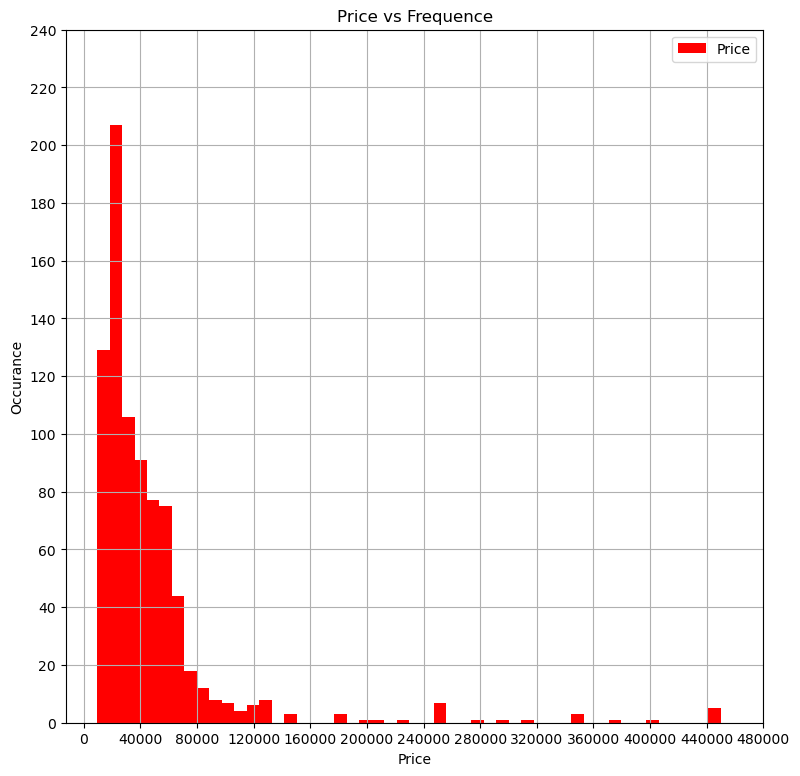

In [53]:
rent_houses_in_hyd['Price'].plot(kind='hist',bins=50, figsize=(9,9),color='r',title = 'Price vs Frequence')
plt.grid()
plt.xlabel('Price')
plt.ylabel('Occurance')
plt.xticks(range(0,500000,40000))
plt.yticks(range(0,250,20))
plt.legend()
plt.show()

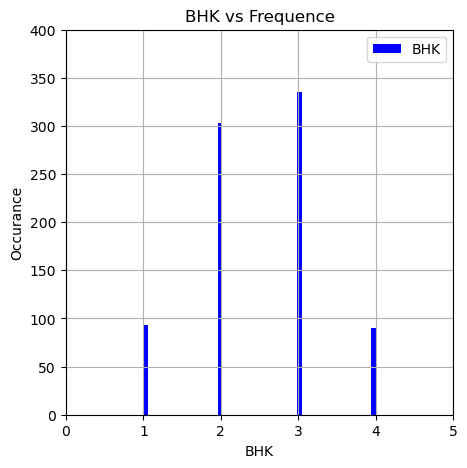

In [54]:
rent_houses_in_hyd['BHK'].plot(kind='hist',bins=50, figsize=(5,5),color='b',title = 'BHK vs Frequence')
plt.grid()
plt.xlabel('BHK')
plt.ylabel('Occurance')
plt.xticks(range(0,6,1))
plt.yticks(range(0,450,50))
plt.legend()
plt.show()

C:\Users\K.ASHOK\AppData\Local\Temp\ipykernel_21520\632496785.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BHK',y='Price',data=rent_houses_in_hyd,palette='viridis')


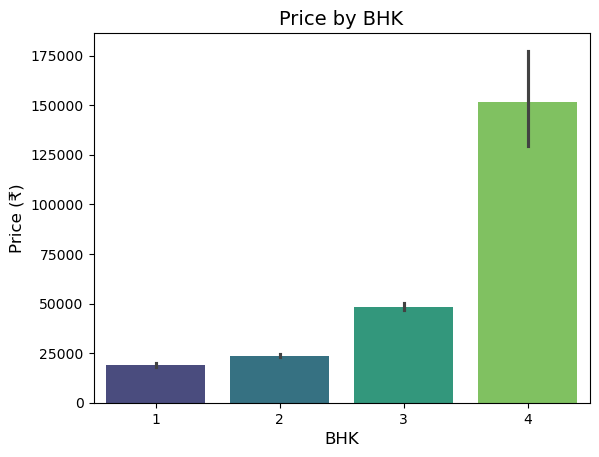

In [55]:
sns.barplot(x='BHK',y='Price',data=rent_houses_in_hyd,palette='viridis')
plt.xlabel("BHK", fontsize=12)
plt.ylabel("Price (₹)", fontsize=12)
plt.title("Price by BHK", fontsize=14)
plt.show()

C:\Users\K.ASHOK\AppData\Local\Temp\ipykernel_21520\2779443338.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Security_Status(24x7)',y='BHK',data=rent_houses_in_hyd,palette = ['g','r'])


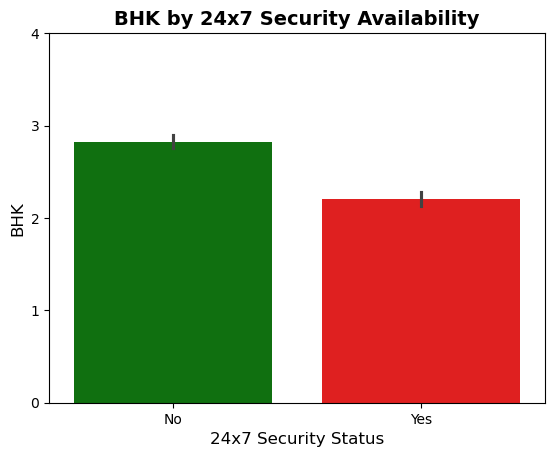

In [56]:
sns.barplot(x='Security_Status(24x7)',y='BHK',data=rent_houses_in_hyd,palette = ['g','r'])
plt.yticks(range(0,5,1))
plt.xlabel("24x7 Security Status", fontsize=12)
plt.ylabel("BHK", fontsize=12)
plt.title("BHK by 24x7 Security Availability", fontsize=14, fontweight='bold')
plt.show()

C:\Users\K.ASHOK\AppData\Local\Temp\ipykernel_21520\3709820785.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BHK_House_Type',y='Price',data=rent_houses_in_hyd,palette=['b','g','orange','r'])


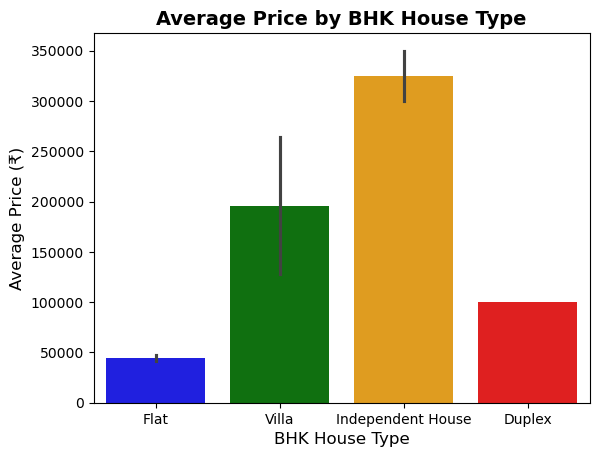

In [57]:
sns.barplot(x='BHK_House_Type',y='Price',data=rent_houses_in_hyd,palette=['b','g','orange','r'])
plt.xlabel("BHK House Type", fontsize=12)
plt.ylabel("Average Price (₹)", fontsize=12)
plt.title("Average Price by BHK House Type", fontsize=14, fontweight='bold')
plt.show()

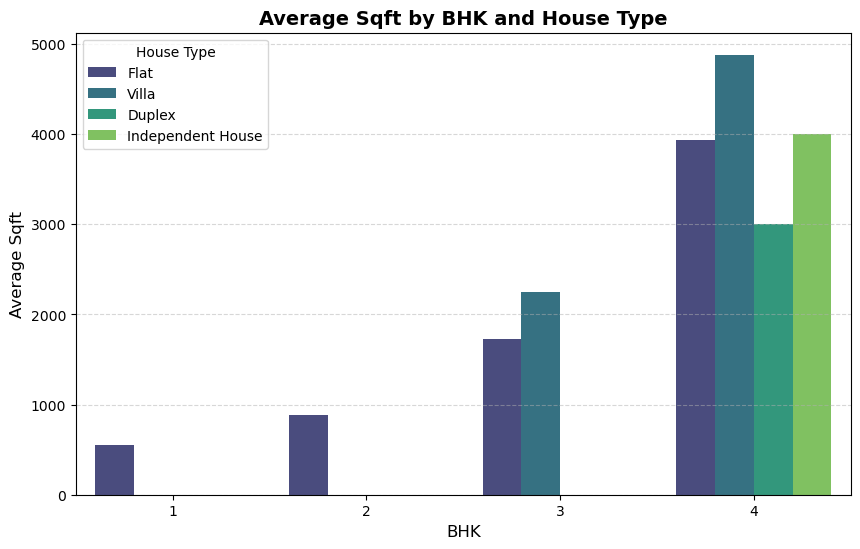

In [58]:
plt.figure(figsize=(10,6))
bhk_stats = rent_houses_in_hyd.groupby(['BHK', 'BHK_House_Type']).agg({'Price': 'mean','BHK_House_sqft': 'mean'}).reset_index()
sns.barplot(x='BHK',y='BHK_House_sqft',hue='BHK_House_Type',data=bhk_stats,palette='viridis')
plt.title("Average Sqft by BHK and House Type", fontsize=14, fontweight='bold')
plt.xlabel("BHK", fontsize=12)
plt.ylabel("Average Sqft", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='House Type')
plt.show()

C:\Users\K.ASHOK\AppData\Local\Temp\ipykernel_21520\1030328186.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values,y=top_locations.index,palette='mako')


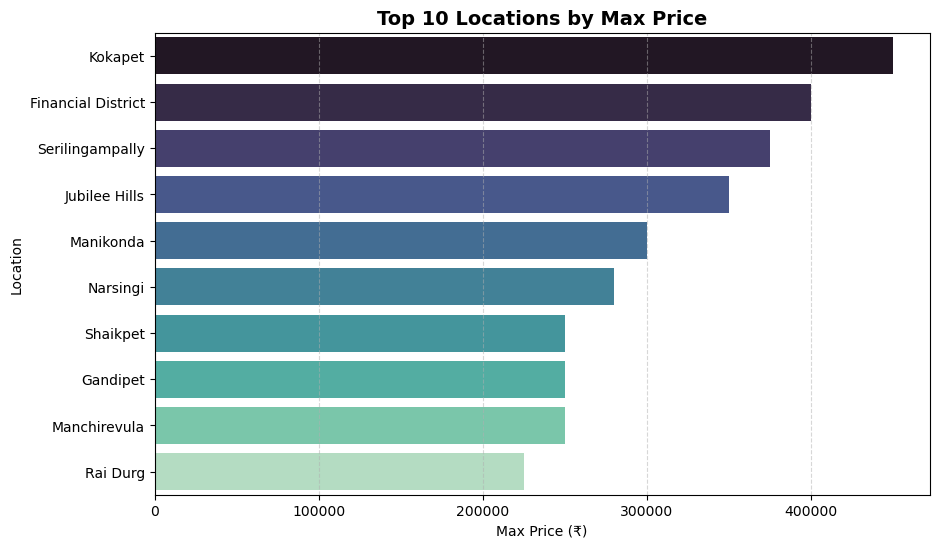

In [59]:
price_stats = rent_houses_in_hyd.groupby(['BHK_House_Type', 'Location']).agg(Max_Price=('Price', 'max'),bhk=('BHK','max')).sort_values(by='Max_Price', ascending=False).reset_index()
top_locations = price_stats.groupby('Location')['Max_Price'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values,y=top_locations.index,palette='mako')
plt.title("Top 10 Locations by Max Price", fontsize=14, fontweight='bold')
plt.xlabel("Max Price (₹)")
plt.ylabel("Location")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

C:\Users\K.ASHOK\AppData\Local\Temp\ipykernel_21520\2208856630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values,y=top_locations.index,palette='mako')


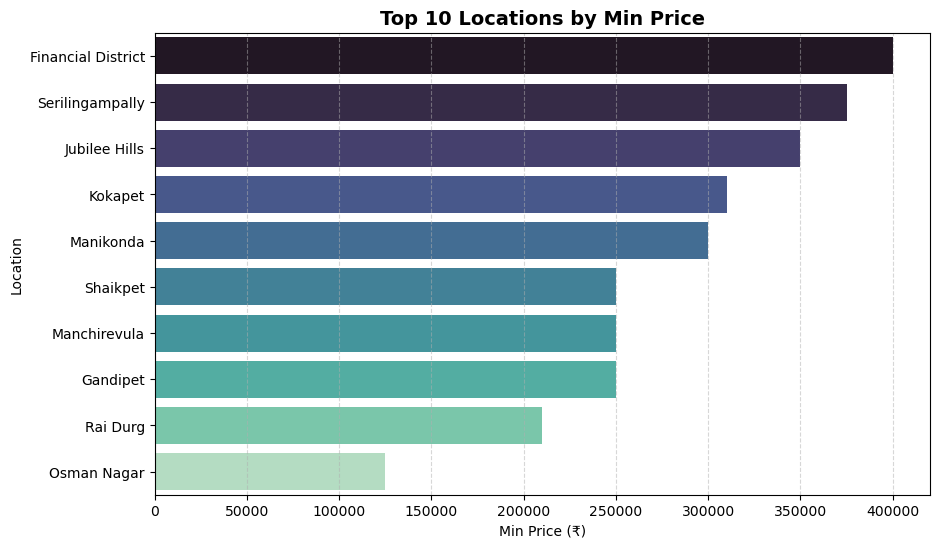

In [60]:
min_price_stats = rent_houses_in_hyd.groupby(['BHK_House_Type', 'Location']).agg(Min_Price=('Price', 'min'),bhk=('BHK','min')).sort_values(by='Min_Price', ascending=False).reset_index()
top_locations = min_price_stats.groupby('Location')['Min_Price'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values,y=top_locations.index,palette='mako')
plt.title("Top 10 Locations by Min Price", fontsize=14, fontweight='bold')
plt.xlabel("Min Price (₹)")
plt.ylabel("Location")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

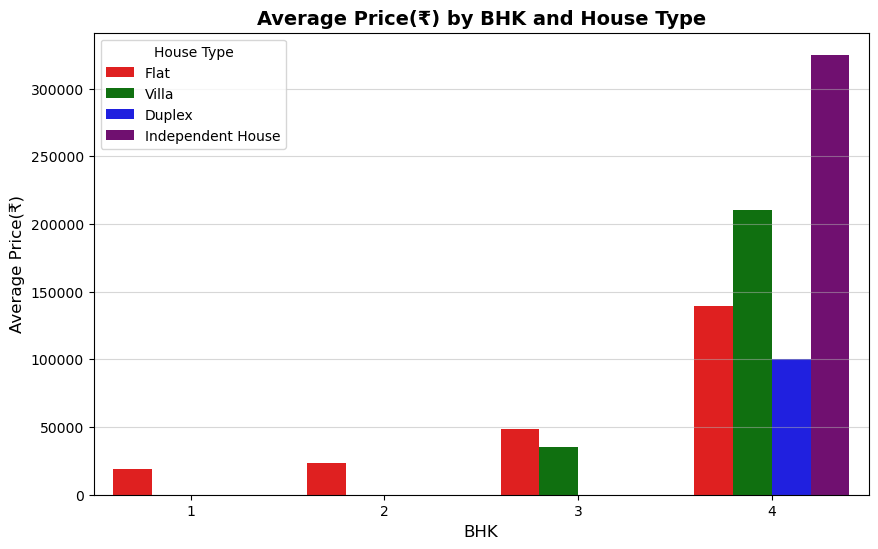

In [61]:
plt.figure(figsize=(10,6))
bhk_stats = rent_houses_in_hyd.groupby(['BHK', 'BHK_House_Type']).agg({'Price': 'mean','BHK_House_sqft': 'mean'}).reset_index()
sns.barplot(x='BHK',y='Price',hue='BHK_House_Type',data=bhk_stats,palette=['red','green','blue','purple'])
plt.title("Average Price(₹) by BHK and House Type", fontsize=14, fontweight='bold')
plt.xlabel("BHK", fontsize=12)
plt.ylabel("Average Price(₹)", fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.legend(title='House Type')
plt.show()

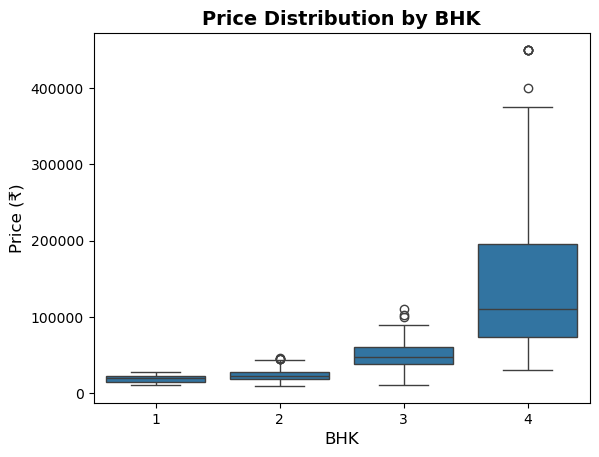

In [62]:
sns.boxplot(x='BHK',y='Price',data=rent_houses_in_hyd)
plt.xlabel("BHK", fontsize=12)
plt.ylabel("Price (₹)", fontsize=12)
plt.title("Price Distribution by BHK", fontsize=14, fontweight='bold')
plt.show()

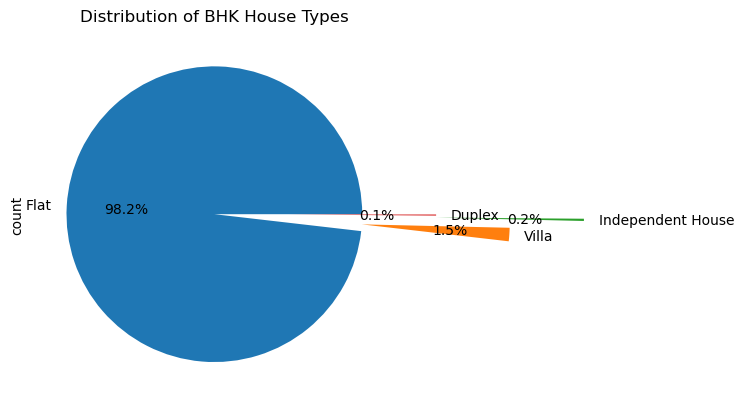

In [63]:
rent_houses_in_hyd['BHK_House_Type'].value_counts().plot(kind = 'pie',explode = [0,1,1.5,0.5],autopct='%1.1f%%')
plt.title('Distribution of BHK House Types')
plt.show()

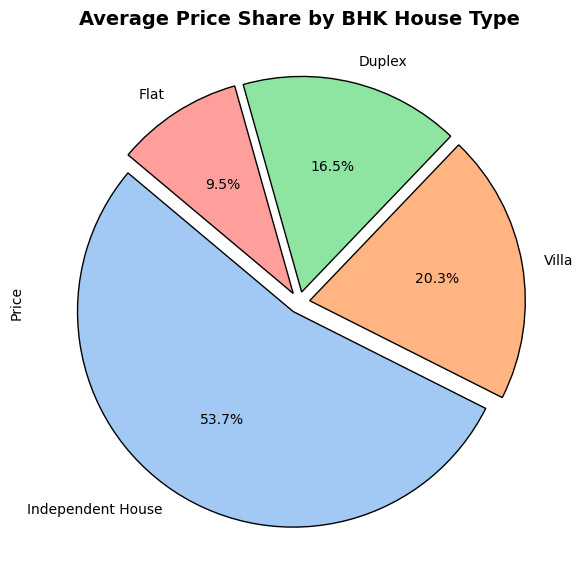

In [64]:
plt.figure(figsize=(7,7))
house_type_price = bhk_stats.groupby('BHK_House_Type')['Price'].mean().sort_values(ascending=False)
explode = [0.05] * len(house_type_price)
house_type_price.plot(kind='pie',autopct='%1.1f%%',startangle=140,explode=explode,colors=sns.color_palette('pastel'),wedgeprops={'edgecolor': 'black'})
plt.title('Average Price Share by BHK House Type', fontsize=14, fontweight='bold')
plt.show()

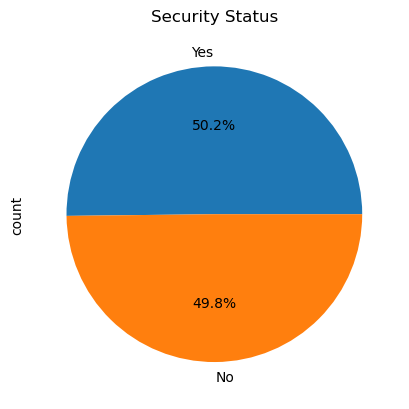

In [65]:
rent_houses_in_hyd['Security_Status(24x7)'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')
plt.title('Security Status')
plt.show()

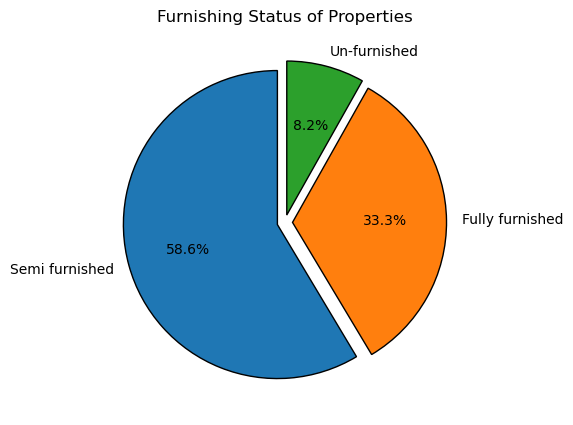

In [66]:
furnish_counts = rent_houses_in_hyd['Furnishing_Status'].value_counts()
plt.figure(figsize=(5, 5))
explode = [0.05] * len(furnish_counts)
plt.pie(furnish_counts.values, labels=furnish_counts.index, autopct='%1.1f%%', startangle=90,explode = explode,wedgeprops={'edgecolor': 'black'})
plt.title('Furnishing Status of Properties')
plt.show()


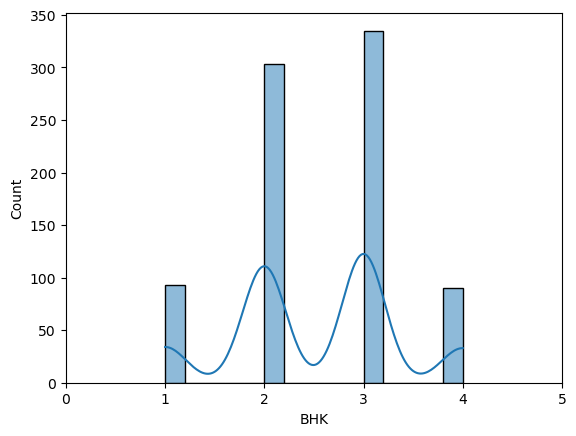

In [67]:
sns.histplot(rent_houses_in_hyd['BHK'],kde=True)
plt.xticks(range(0,6,1))
plt.show()

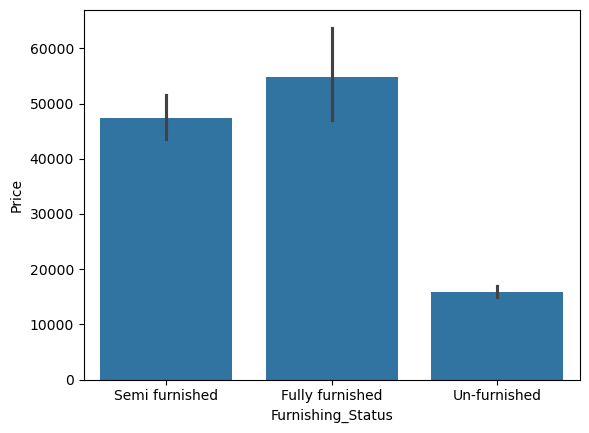

In [68]:
sns.barplot(x='Furnishing_Status',y='Price',data=rent_houses_in_hyd)
plt.show()

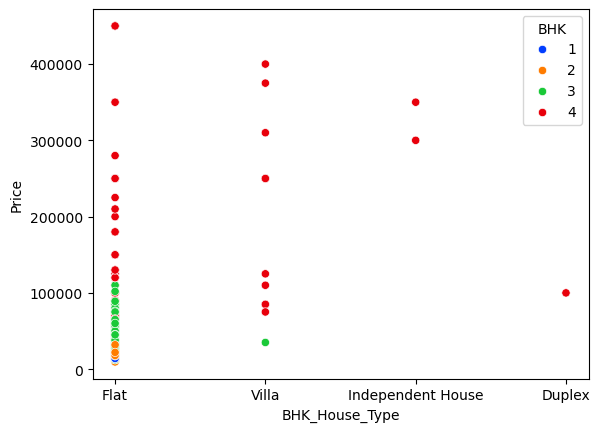

In [69]:
sns.scatterplot(x='BHK_House_Type',y='Price',data=rent_houses_in_hyd, hue='BHK',palette="bright")
plt.show()

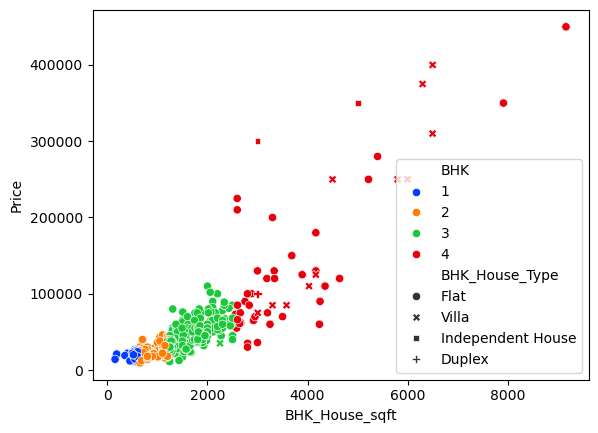

In [70]:
sns.scatterplot(x='BHK_House_sqft',y='Price',data=rent_houses_in_hyd, hue='BHK',style = 'BHK_House_Type',palette="bright")
plt.show()

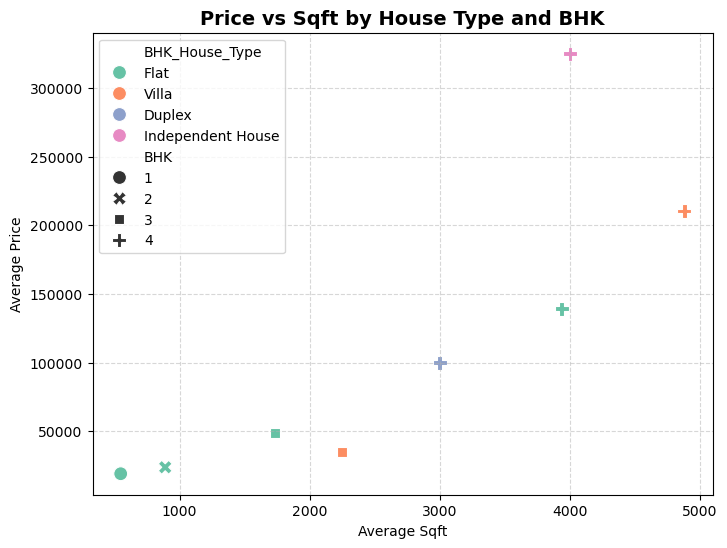

In [71]:
plt.figure(figsize=(8,6))
bhk_stats = rent_houses_in_hyd.groupby(['BHK', 'BHK_House_Type']).agg({'Price': 'mean','BHK_House_sqft': 'mean'}).reset_index()
sns.scatterplot(x='BHK_House_sqft',y='Price',hue='BHK_House_Type',style='BHK',data=bhk_stats,palette='Set2',s=100)
plt.title("Price vs Sqft by House Type and BHK", fontsize=14, fontweight='bold')
plt.xlabel("Average Sqft")
plt.ylabel("Average Price")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

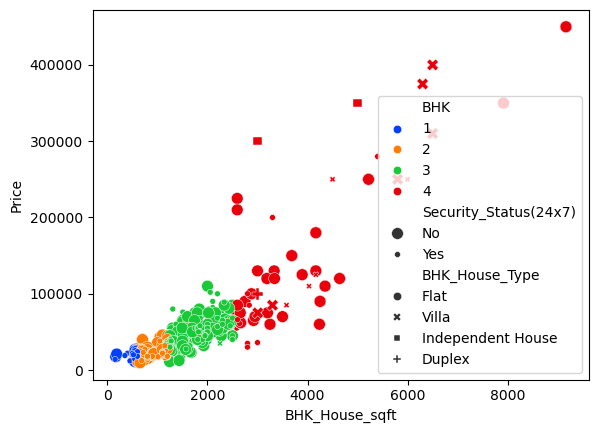

In [72]:

sns.scatterplot(x='BHK_House_sqft',y='Price',data=rent_houses_in_hyd, hue='BHK',style = 'BHK_House_Type',size = 'Security_Status(24x7)',palette="bright")
plt.show()

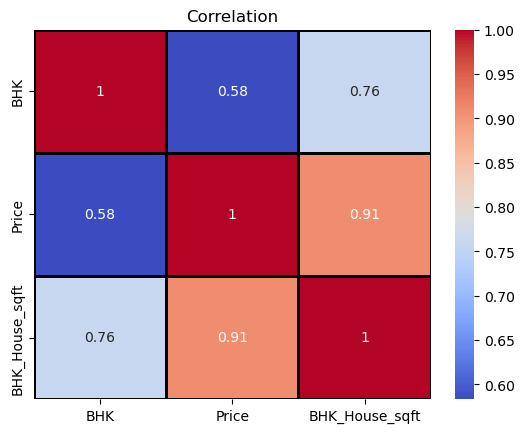

In [73]:
corr = rent_houses_in_hyd.corr(numeric_only = True)
sns.heatmap(corr,annot = True,cmap = 'coolwarm',linewidth = 2,linecolor = 'black')
plt.title('Correlation')
plt.show()